# **Libraries**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
transform = transforms.ToTensor()

In [ ]:
train_data = datasets.MNIST(root='/content/sample_data/cnn_data', train=True, download=True, transform=transform)

In [ ]:
test_data = datasets.MNIST(root='/content/sample_data/cnn_data', train=False, download=True, transform=transform)

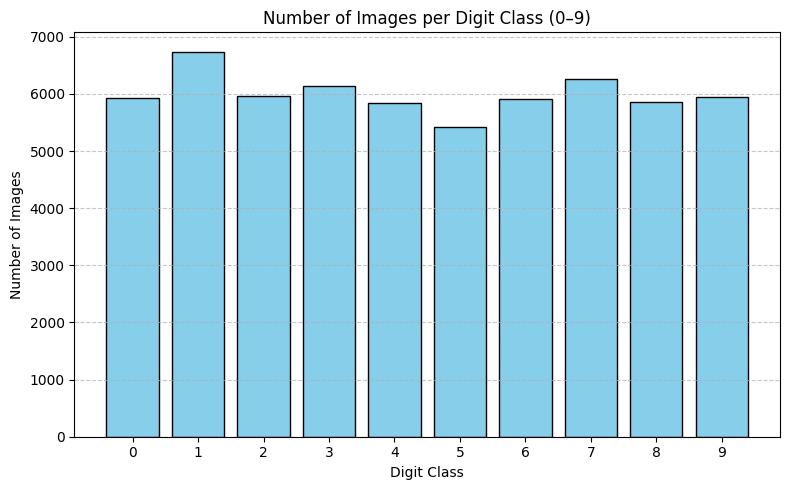

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(unique_classes.tolist(), class_counts.tolist(), color='skyblue', edgecolor='black')
plt.xticks(unique_classes.tolist())
plt.xlabel('Digit Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Digit Class (0–9)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/sample_data/cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /content/sample_data/cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=100, shuffle=False)

# Our ConvolutionalNetwork Model

In [ ]:
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    # Fully Connected Layer
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2)

    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2)

    X = X.view(-1, 16*5*5)

    # Fully Connected Layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X, dim=1)

In [ ]:
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# **Training**

In [ ]:
epochs = 5

for epoch in range(epochs):
    running_loss = 0.0
    batch_count = 0

    for X_train, y_train in train_loader:
        y_pred = model(X_train)                   # Forward pass
        loss = criterion(y_pred, y_train)         # Loss calculation

        optimizer.zero_grad()                     # Old gradients clear
        loss.backward()                           # Backpropagation
        optimizer.step()                          # Update weights

        running_loss += loss.item()               # Loss add karte jao
        batch_count += 1

    avg_loss = running_loss / batch_count         # Har epoch ka average
    print(f"Epoch {epoch+1}/{epochs}, Average Loss = {avg_loss:.4f}")


Epoch 1/5, Average Loss = 0.3347
Epoch 2/5, Average Loss = 0.0952
Epoch 3/5, Average Loss = 0.0678
Epoch 4/5, Average Loss = 0.0529
Epoch 5/5, Average Loss = 0.0440


# **Testing**

In [ ]:
test_load_everything = DataLoader(test_data, batch_size=1000, shuffle=False)

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for X_test, y_test in test_loader:
        y_val = model(X_test)
        predicted = torch.max(y_val, 1)[1]
        correct += (predicted == y_test).sum().item()
        total += y_test.size(0)

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 98.89%


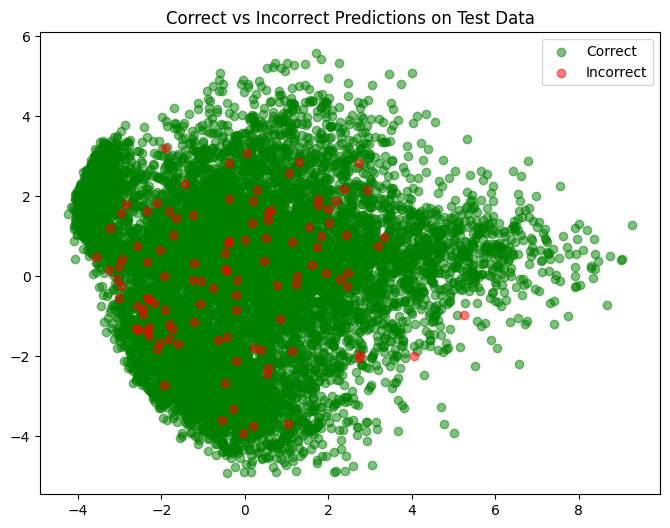

In [ ]:
from sklearn.decomposition import PCA

test_loader_full = DataLoader(test_data, batch_size=len(test_data), shuffle=False)

model.eval()
with torch.no_grad():
    for X_test, y_test in test_loader_full:
        y_val = model(X_test)
        predicted = torch.max(y_val, 1)[1]
        break

correct_mask = (predicted == y_test)

X_flat = X_test.view(len(X_test), -1)
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_flat)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d[correct_mask, 0], X_2d[correct_mask, 1],
            c="green", alpha=0.5, label="Correct")
plt.scatter(X_2d[~correct_mask, 0], X_2d[~correct_mask, 1],
            c="red", alpha=0.5, label="Incorrect")
plt.legend()
plt.title("Correct vs Incorrect Predictions on Test Data")
plt.show()


In [ ]:
test_data[1978]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
test_data[1978][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
test_data[1978][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

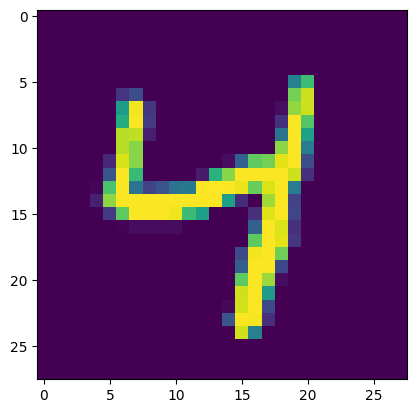

In [ ]:
plt.imshow(test_data[1978][0].reshape(28,28))

In [ ]:
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[1978][0].view(1,1,28,28))

In [ ]:
new_prediction

tensor([[-2.0861e+01, -1.2965e+01, -1.5798e+01, -1.9174e+01, -1.0693e-04,
         -1.4146e+01, -1.7377e+01, -9.2823e+00, -1.5226e+01, -1.1469e+01]])

In [ ]:
new_prediction.argmax()

tensor(4)